In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import process_image

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# Categorize target
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [9]:
# Standardize features
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [12]:
# Learn: relu activation function, filters, kernel_size
# categorical crossentropy, rms prop, metrics
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [14]:
model.fit(X_train, y_cat_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 30s 502us/step - loss: 0.1265 - acc: 0.960
Epoch 2/3
60000/60000 [==============================] - 30s 495us/step - loss: 0.0420 - acc: 0.98
Epoch 3/3
60000/60000 [==============================] - 27s 457us/step - loss: 0.0318 - acc: 0.990


In [15]:
model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 1s 134us/st


[0.030696342178048872, 0.9907]

In [16]:
model.save('model.h5')

In [17]:
directory = 'data'
test_image_names = os.listdir(directory)
test_image_names.remove('.ipynb_checkpoints')

print(test_image_names)

['test-1-01.jpg', 'test-2-01.jpeg', 'test-5-01.jpg', 'test-4-01.jpg', 'test-6-01.jpg', 'test-2-02.jpg', 'test-3-01.jpg', 'multiple-numbers.jpg', 'test-2-04.jpg', 'test-2-03.jpg', 'test-2-01.jpg']


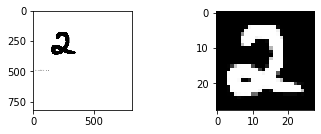

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
real_image = cv2.imread(directory + '/' + test_image_names[9])
real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)

gray_image = 255 - cv2.cvtColor(real_image, cv2.COLOR_RGB2GRAY)
gray_image = process_image.convert_image_for_mnist(gray_image)

plt.subplot(221)
plt.imshow(real_image)

plt.subplot(222)
plt.imshow(gray_image, cmap='gray')
plt.show()

model.predict(gray_image.reshape(1, 28, 28, 1))